# 미니 프로젝트 : Pandas로 문화(영화)산업 분석
### 5기 박혜진


<div class="alert-danger">
    
# 1. 라이브러리 및 데이터  
  
</div>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv("movies_train.csv", parse_dates=['release_time'])

### 결측치 확인 / 데이터 전처리

In [3]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

> dir_prev_bfnum에 결측치 존재

In [4]:
train[train['dir_prev_bfnum'].isna()].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [5]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

> dir_prev_bnum의 결측치 데이터의 dir_prev_bfnum의 값이 모두 0이므로 마찬가지로 dir_prev_bfnum를 0으로 대체

In [6]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [7]:
train.isna().sum() #결측치 재확인

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

<div class="alert-danger">
    
# 2. EDA (탐색적 자료분석)
  
</div>

In [8]:
print(train.shape)
train.head()

(600, 12)


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


> (600개 데이터)
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

### 2) 데이터 요약

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
title             600 non-null object
distributor       600 non-null object
genre             600 non-null object
release_time      600 non-null datetime64[ns]
time              600 non-null int64
screening_rat     600 non-null object
director          600 non-null object
dir_prev_bfnum    600 non-null float64
dir_prev_num      600 non-null int64
num_staff         600 non-null int64
num_actor         600 non-null int64
box_off_num       600 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.3+ KB


In [10]:
train.dtypes

title                     object
distributor               object
genre                     object
release_time      datetime64[ns]
time                       int64
screening_rat             object
director                  object
dir_prev_bfnum           float64
dir_prev_num               int64
num_staff                  int64
num_actor                  int64
box_off_num                int64
dtype: object

In [11]:
train.describe() # 숫자형 데이터 요약

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [12]:
train.describe(include=np.object) #문자형 데이터 요약

,title,distributor,genre,screening_rat,director
count,600,600,600,600,600
unique,600,169,12,4,472
top,방독피,CJ 엔터테인먼트,드라마,청소년 관람불가,홍상수
freq,1,54,221,204,7


In [13]:
pd.DataFrame(train.distributor.value_counts()).head(8) #배급사 상위 8곳

,distributor
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
인디스토리,26
(주)쇼박스,26
골든타이드픽처스,15
(주) 케이알씨지,14


In [14]:
hot_movie = train.sort_values(by='box_off_num',ascending=False)[:10] # 관객수 상위 10개
hot_movie

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.000000e+00,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,0.000000e+00,0,311,5,11374879
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,0.000000e+00,0,67,10,9350351
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1.242778e+06,2,298,6,9135806
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725


In [15]:
pd.DataFrame(train.genre.value_counts()) #장르 통계

,genre
드라마,221
다큐멘터리,93
멜로/로맨스,78
코미디,53
공포,42
액션,28
느와르,27
애니메이션,21
미스터리,17
SF,13


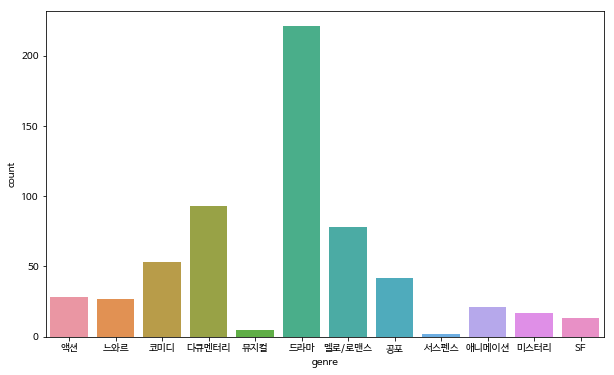

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre',data=train)

In [18]:
pd.DataFrame(train.screening_rat.value_counts()) #관람 등급 통계

,screening_rat
청소년 관람불가,204
15세 관람가,202
12세 관람가,102
전체 관람가,92


In [19]:
train.corr() # 숫자형 변수들 간 상관관계

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.266065,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.266065,1.000000,0.396616,0.369657,0.042491,0.293791
dir_prev_num,0.306727,0.396616,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.369657,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.042491,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.293791,0.259674,0.544265,0.111179,1.000000


> *출연 배우 수(num_actor)*와 다른 변수들 간 관계성은 전반적으로 **매우 낮음**을 확인  
> *상영시간(time)*과 *스텝수(num_staff)*간 **약간의 관계성**을 확인

<div class="alert-danger">
    
# 3. 유의미한 결과 및 시각화
  
</div>

### 1) 영화 장르별 영화 흥행 성적

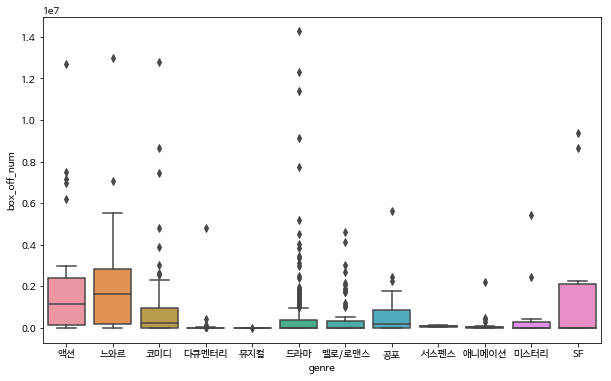

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre',y='box_off_num',data=train)
plt.show()

> 평균적으로 **느와르 영화가 평균 관객수가 높음**을 확인할 수 있다. 뒤이어 액션 장르가 평균적으로 높은 관객수를 보였다. 하지만 각 장르 내에서 box 범위를 벗어나 흥행하는 장르는 드라마가 월등하게 많음을 알 수 있다.

In [32]:
#500만 이상 관객 영화
train_500 = train.loc[train['box_off_num'] >= 5000000]
train_500.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.00,1,572,11,7453715
74,아저씨,CJ 엔터테인먼트,액션,2010-08-04,119,청소년 관람불가,이정범,0.00,0,509,2,6178665
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1242778.00,2,298,6,9135806


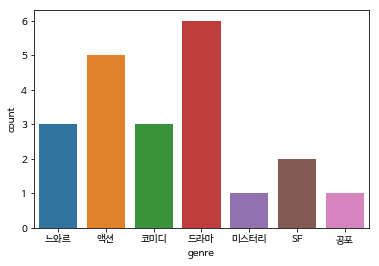

In [33]:
sns.countplot(x='genre',data=train_500) 
plt.show()

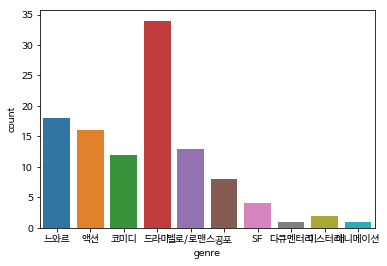

In [22]:
#100만 이상 관객 영화
train_100 = train.loc[train['box_off_num'] >= 1000000] 
train_100.head()
sns.countplot(x='genre',data=train_100)
plt.show()

> 관객수가 **500만명 이상인 영화의 경우 드라마 장르가 가장 많음**을 확인.  
> 뒤이어 액션, 느와르, 코미디 장르가 500만 관객 영화에 고루 존재함을 확인.  
> 하지만 관객 100만명 이상 영화를 살펴보면 **드라마 장르가 다른 장르들에 비해 배로 많음**을 알 수 있는데, 이는 EDA에서 살펴본 바와 같이 제작되는 영화 수가 많은 만큼 흥행을 거두는 것으로 볼 수 있음.

### 2) 연도&월별 영화 관객수

In [51]:
#연도별 전체 영화 관객수 추이
train['release_year']=train['release_time'].dt.year

year_num = train[['release_year','box_off_num']].groupby('release_year').sum()
year_num

,box_off_num
release_year,
2010,48749235
2011,50309371
2012,83223817
2013,95698992
2014,75423331
2015,71504305


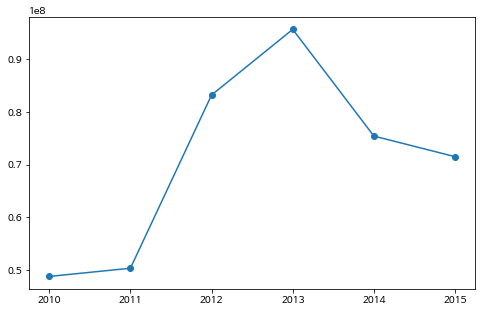

In [129]:
plt.figure(figsize=(8,5))
plt.plot(year_num,  marker='o')
plt.show()

> 2010~2015 전체 영화관객수 그래프.  
> 2010,2011년에 비해 **2012년에 영화 관객수가 크게 증가**했다. 하지만 2013년을 지나 2014년에 약간의 하락 모습을 볼 수 있다.

In [16]:
#월별 전체 영화 관객수 비교
train['release_month']=train['release_time'].dt.month

month_num = pd.DataFrame(train[['release_month','box_off_num']].groupby('release_month').sum())
month_num

,box_off_num
release_month,
1,53271292
2,20553781
3,14242143
4,12133835
5,32814059
6,14856308
7,54576555
8,56603892
9,43891718


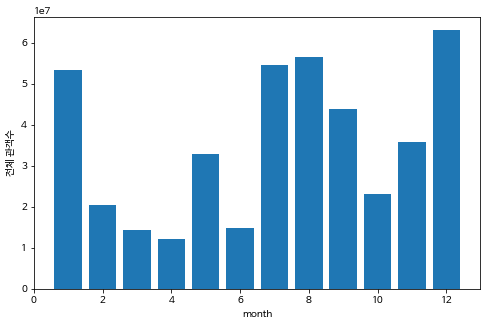

In [18]:
index = np.arange(1,13) #1월 ~ 12월
plt.figure(figsize=(8,5))
plt.bar(index,'box_off_num',data=month_num)
plt.xlabel('month')
plt.ylabel('전체 관객수')
plt.show()

> 12월과 1월, 7월과 8월이 높은 것을 보아 **여름 및 겨울 방학 기간에 관객수가 많음**을 알 수 있다.  
> 상반기 기간 중, '가정의 달'인 5월에도 높은 관객수를 보인다.

### 3) 상영 등급에 따른 흥행 성적

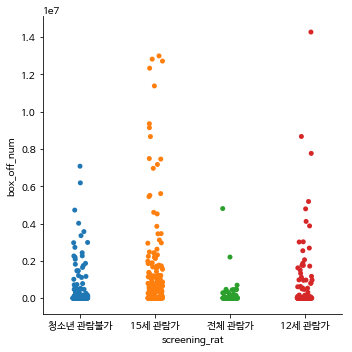

In [20]:
sns.catplot(x='screening_rat',y='box_off_num',data=train) 
plt.show()

> **'15세 관람가' 영화에서 높은 관객수가 다수** 관찰된다.  
> 뒤이어 '12세 관람가' 영화와 '청소년 관람불가'영화도 종종 높음 관객수가 관찰된다.  
> 상대적으로 '전체관람가'영화에서는 높은 관객수를 기대하기 어려운 듯하다,

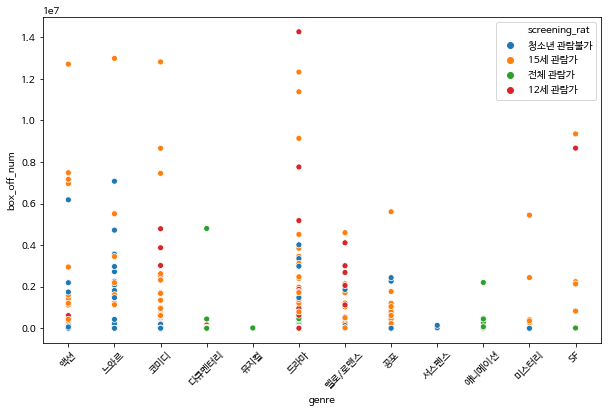

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='box_off_num',x='genre',data=train, 
                hue='screening_rat')
plt.xticks(rotation=45)
plt.show()

> 전체 12개 장르 중 **7개(액션, 느와르, 코미디, 멜로, 공포, 미스터리, SF) 장르에서 최고 흥행 작품이 '15세 관람가'** 로 관찰 된다.  

> **드라마 장르에서 최고 흥행을 거둔 영화는 '12세 관람가'** 로 **600개 영화 전체에서 최고 관객수** 이기도 하다.  
> 나머지 장르 중 **3개(다큐멘터리, 뮤지컬, 애니메이션) 장르에서 '전체 관람가'가 최고 흥행** 했다.     
> 서스펜스는 장르에 맞게 '청소년 관람불가' 등급이 최고 성적이다.  

### 4) 감독의 이전 영화 및 현재 영화 관객수

In [10]:
# 과겨 관객수나 과거 영화 수가 0 초과인 데이터
dir_num = train[ (train['dir_prev_bfnum'] > 0) & (train['box_off_num'] > 0) ]
dir_num.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211


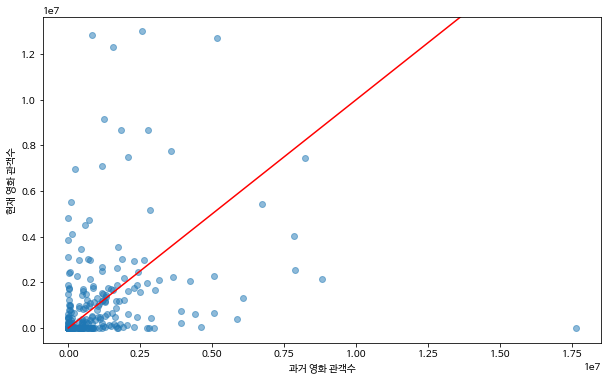

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(x='dir_prev_bfnum',y='box_off_num',data=dir_num, alpha=0.5)
plt.xlabel('과거 영화 관객수')
plt.ylabel('현재 영화 관객수')
plt.gca().add_line(plt.Line2D((0,10**8),(0,10**8),color='r'))
plt.show()

> 과거 영화 관객수에 비해서 현재 영화 관객수가 높거나 낮음은 비슷한 수준으로 볼 수 있다.  
> 하지만 **과거 관객수에 비해서 현재 영화가 월등하게 높은 관객수를 갖는 감독이 많음**을 알 수 있다.

### 5) 스태프 및 배우 수에 따른 영화 상영 시간

In [39]:
# 영화에 참여한 사람 전체 'num_all' 변수
train['num_all'] = train['num_staff']+train['num_actor']

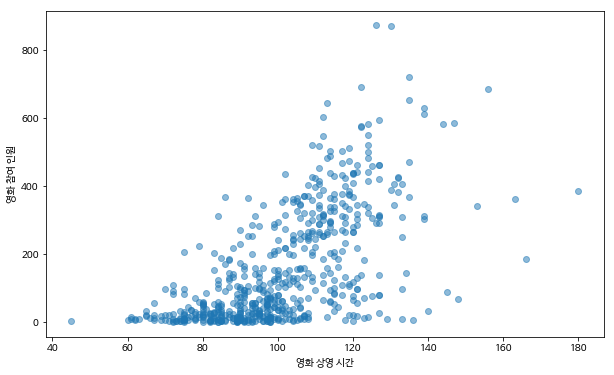

In [91]:
plt.figure(figsize=(10,6))
plt.scatter('time','num_all',data=train,alpha=0.5)
plt.xlabel('영화 상영 시간')
plt.ylabel('영화 참여 인원')
plt.show()

> 주로 **영화 상영 시간이 짧을 수록 영화 참여 인원이 적음**을 알 수 있다.  
> 영화 상영 시간이 길다고해서 무조건 참여 인원이 많아지는 경향은 아님을 파악할 수 있다.  
> (상영 시간이 짧은 영화에서 많은 인원이 투입된 경우는 찾기 힘든 것이 사실이지만, 상영 시간이 긴 영화에서는 참여 인원의 많고 적음의 관련이 없음)